# How to pay for a war: part 1

### An application of Markov jump linear quadratic dynamic programming

#### By [Sebastian Graves](https://github.com/sebgraves) and [Thomas J. Sargent](http://www.tomsargent.com/)

---

This notebook constructs generalizations of Barro's classic  1979 model of tax smoothing.  Our generalizations are adaptations of extensions of his 1979 model suggested by Barro (1999, 2003).

Barro's original 1979  model is about a government that borrows and lends in order to help it minimize an intertemporal measure of  distortions caused by taxes. 

Technical tractability induced Barro to assume that 

   *  the government trades only one-period risk-free debt,  and 
   
   *  the one-period risk-free interest rate is constant. 

By using a secret weapon -- *Markov jump linear quadratic dynamic programming* -- we can allow interest rates to move over time in empirically interesting ways. Also, by expanding the dimension of the state, we can add  a maturity composition decision  to the government's problem. It is by doing these two things that we extend Barro's 1979 model along lines he suggested in Barro (1999, 2003).

Barro (1979) assumed 

  * that a government faces an **exogenous sequence** of expenditures that it must finance by a tax collection sequence whose expected present value equals the initial debt it owes plus the expected present value of those expenditures 

  * that the government wants to minimize the following measure of tax distortions: $E_0 \sum_{t=0}^\infty \beta^t T_t^2 $, where $T_t$ are total tax collections and $E_0$ is a mathematical expectation conditioned on time $0$ information 

  * that the government trades only one asset, a risk-free one-period bond
  
  * that the gross interest rate on the one-period bond is constant and equal to $\beta^{-1}$,
  the reciprocal of the factor $\beta$ at which the government discounts future tax disortions

Barro's model can be mapped into a discounted linear quadratic dynamic programming problem.

Our generalizations of Barro's (1979) model, partly inspired by Barro (1999) and Barro (2003), assume 

  * that the government borrows or saves in the form of risk-free bonds of maturities $1, 2, \ldots , H$
  
  * that interest rates on those bonds are time-varying and in particular governed by a jointly stationary stochastic process.

Our generalizations are designed to fit within a generalization of an ordinary  linear quadratic dynamic programming problem in which matrices defining the quadratic objective function and the state transition function are **time-varying** and **stochastic**. This generalization,known as a **Markov jump linear quadratic dynamic program** combines 

  * the computational simplicity of **linear quadratic dynamic programming**, and
  
  * the ability of **finite state Markov chains** to represent interesting patterns of random variation

We want  the stochastic time variation in the matrices defining the dynamic programming problem to represent variation over time in

  * interest rates
  
  * default rates
  
  * roll over risks
  
  
The idea underlying **Markov jump linear quadratic dynamic programming** is to replace  the constant matrices defining a **linear quadratic dynamic programming problem** with 
matrices that are fixed functions of an $N$ state Markov chain.  

For infinite horizon problems, this leads to  $N$ interrelated matrix Riccati equations  that pin down $N$ value functions and $N$ linear decision rules,
applying to  the $N$ Markov states.


#### Public finance questions

Barro's 1979 model is designed to answer questions such as

   * Should a government finance an exogenous  surge in government expenditures by raising taxes or borrowing?
   
   * How does the answer to that first question depend on the exogenous stochastic process for government expenditures, for example, on whether the surge in government expenditures can be expected to be temporary or permanent?
   
Barro's 1999 and 2003 models are designed to answer more fine-grained questions such as

   *  What determines whether a government wants to issue short-term or long-term debt?  
   
   *  How do roll-over risks affect that decision?  
   
   *  How does the government's long-short *portfolio management* decision depend on features of the exogenous stochastic process for government expenditures?
   
Thus, both the simple and the more fine-grained versions of Barro's models are ways of precisely formulating the classic issue  of *How to pay for a war*

#### Organization

This notebook describes:

  * Markov jump linear quadratic (LQ) dynamic programming
  
  * An application of Markov jump LQ dynamic programming to a model in which a government faces exogenous time-varying interest rates for issuing one-period risk-free debt
  
A [sequel to this notebook](https://github.com/QuantEcon/TaxSmoothing/blob/master/Tax_Smoothing_2.ipynb) describes applies Markov LQ control to settings in which a government issues risk-free debt of different maturities

## Markov jump linear quadratic control

**Markov jump linear quadratic dynamic programming** combines  advantages
of 

  * the computational simplicity of **linear quadratic dynamic programming**, and
  
  * the ability of **finite state Markov chains** to represent interesting patterns of random variation

The idea underlying **Markov jump linear quadratic dynamic programming** is to replace  the constant matrices defining a **linear quadratic dynamic programming problem** with 
matrices that are fixed functions of an $N$ state Markov chain.  

For infinite horizon problems, this leads to  $N$ interrelated matrix Riccati equations  that determine $N$ optimal value functions and $N$ linear decision rules. These value functions and decision rules apply in  the $N$ Markov states: i.e., when the Markov
state is in state $j$, the value function and decision rule for state $j$ prevails.

##### The ordinary discounted linear quadratic dynamic programming problem
It is handy to have the following reminder in mind.

A **linear quadratic dynamic programming problem** consists of a scalar discount factor $\beta \in (0,1)$, an $n\times 1$ state vector $x_t$, an initial condition for $x_0$,  a $k \times 1$ control vector $u_t$, a $p \times 1$ random shock vector $w_{t+1}$ and the following  two triples of matrices:

   * A triple of matrices $(R, Q, W)$ defining a loss function
   
   $$ r(x_t, u_t) = x_t' R x_t + u_t' Q u_t + 2 u_t' W x_t $$
   
      
   * a triple of matrices $(A, B, C)$ defining a state-transition law
   
   $$ x_{t+1} = A x_t + B u_t + C w_{t+1} $$
   
The problem is  


$$
-x_0' P x_0 - \rho = \min_{\{u_t\}_{t=0}^\infty} E \sum_{t=0}^{\infty} \beta^t r(x_t, u_t)  $$

subject to the transition law for the state. 


The optimal decision rule for this problem  have the form

$$ u_t = - F x_t $$

and the optimal value function is of the form

$$ -\left( x_t' P x_t  + \rho \right) $$

where $P$ solves the algebraic matrix Riccati equation


$$
P = R+ \beta A' P A_i
          -(\beta B'  P A + W)' (Q + \beta B P B )^{-1} (\beta B P A + W)$$
          
and the constant $\rho$ satisfies

$$\rho = \beta
  \left( \rho + {\rm trace}(P C C') \right)$$
  
and the matrix $F$ in the decision rule for $u_t$ satisfies

$$
F = (Q + \beta  B' P B)^{-1} (\beta (B' P A )+ W)$$




### Markov jump coefficients

The idea is to make the matrices $A, B, C, R, Q, W$ fixed functions of a finite state $s$ that is governed by an $N$ state Markov chain.  This makes decision rules depend on the Markov state, and so fluctuate through time  restricted ways.  

In particular, we use the following extension of a discrete time linear quadratic dynamic programming problem.

We let  $ s(t) \equiv s_t \in [1, 2, \ldots, N]$ be a time t realization of an $N$ state Markov chain with transition
matrix $\Pi$ having typical element $\Pi_{ij}$.  Here $i$ denotes today and  $j$ denotes tomorrow and

$$ \Pi_{ij} = {\rm Prob}(s_{t+1} = j |s_t = i) $$


We'll switch between labeling today's state as  $s(t)$ and $i$ and between labeling tomorrow's state as  $s(t+1)$ or $j$.


The decision maker solves the minimization problem:

$$
\min_{\{u_t\}_{t=0}^\infty} E \sum_{t=0}^{\infty} \beta^t r(x_t, s(t), u_t)  $$
    with
    
 $$ r(x_t, s(t), u_t) = -( x_t' R(s_t) x_t + u_t' Q(s_t) u_t + 2 u_t' W(s_t) x_t)
 $$ 
 
subject to linear laws of motion with matrices $(A,B,C)$ each possibly dependent on the Markov-state-$s_t$:

$$
 x_{t+1} = A(s_t) x_t + B(s_t) u_t + C(s_t) w_{t+1} $$
 
where $\{w_{t+1}\}$ is an i.i.d. stochatic process with $w_{t+1} \sim {\cal N}(0,I)$.


The optimal decision rule for this problem  have the form

$$ u_t = - F(s_t) x_t $$

and the optimal value functions are of the form

$$ -\left( x_t' P(s_t) x_t  + \rho(s_t) \right) $$

or equivalently

$$ -x_t' P_i x_t - \rho_i $$

The optimal value functions  $- x' P_i x - \rho_i$ for $i = 1, \ldots, n$ satisfy the $N$ interrelated Bellman equations 

\begin{align*}
-x' P_i x - \rho_i  & = \max_u - \biggl[ x'R_i x + u' Q_i u + 2 u' W_i x \cr &
              \beta \sum_j \Pi_{ij}E ((A_i x + B_i u + C_i w)' P_j (A_i x + B_i u + C_i w) x + \rho_j) \biggr]
\end{align*}

The matrices $P(s(t)) = P_i$ and the scalars $ \rho(s_t) = \rho_i,  i = 1, \ldots, n $
satisfy  the following stacked system of **algebraic matrix Riccati** equations:

$$
P_i = R_i + \beta \sum_j A_i' P_j A_i
 \Pi_{ij}
          -\sum_j \Pi_{ij}[ (\beta B_i'  P_j A_i + W_i)' (Q + \beta B_i' P_j B_i)^{-1} (\beta B_i' P_j A_i + W_i)]$$

$$\rho_i = \beta
 \sum_j \Pi_{ij} ( \rho_j + {\rm trace}(P_j C_i C_i') )$$
 
and the $F_i$ in the optimal decision rules are

$$
F_i = (Q_i + \beta \sum_j \Pi_{ij} B_i' P_j B_i)^{-1} (\beta \sum_j \Pi_{ij}(B_i' P_j A_i )+ W_i)$$



## Barro (1979) Model

We begin by solving a version of the Barro (1979) model by mapping it into the original LQ framework. As mentioned [in this lecture](http://lectures.quantecon.org/py/perm_income_cons.html), the Barro model is mathematically isomorphic with the LQ permanent income model.

Let $T_t$ denote tax collections, $\beta$ a discount factor, $b_{t,t+1}$ time $t+1$ goods that the government promises to pay at $t$, $G_t$ government purchases, $p_{t,t+1}$ the number of time $t$ goods received per time $t+1$ goods promised. Evidently, $p_{t, t+1}$ is inversely related to appropriate corresponding gross  interest rates on government debt.

In the spirit of Barro (1979), the stochastic  process of government expenditures is exogenous. The government's problem is to choose a plan for taxation and borrowing $\{b_{t+1}, T_t\}_{t=0}^\infty$ to minimize

$$ E_0 \sum_{t=0}^\infty \beta^t T_t^2  $$
subject to the constraints
 $$ T_t + p_{t,t+1} b_{t,t+1} = G_t + b_{t-1,t} $$
 $$G_t = U_{g,t} z_t $$
 $$ z_{t+1} = A_{22,t} z_t + C_{2,t} w_{t+1} $$

where $w_{t+1} \sim {\cal N}(0,I)$. The variables $T_t, b_{t, t+1}$ are *control* variables chosen at $t$,
while $b_{t-1,t}$ is an endogenous state variable inherited from the past at time $t$ and $p_{t,t+1}$ is an exogenous state variable at time $t$. To begin with, we will assume that $p_{t,t+1}$ is constant (and equal to $\beta$), but we will also extend the model to allow this variable to evolve over time.

To map into the LQ framework, we will use $x_t = \begin{bmatrix} b_{t-1,t} \\ z_t \end{bmatrix}$ as the state vector, and $u_t = b_{t,t+1}$ as the control variable. Therefore, the (A,B,C) matrices are defined by the state-transition law:

$$ x_{t+1} = \begin{bmatrix} 0 & 0 \\ 0 & A_{22} \end{bmatrix} x_t + \begin{bmatrix} 1 \\ 0 \end{bmatrix} u_t + \begin{bmatrix} 0 \\ C_2 \end{bmatrix} w_{t+1}$$

To find the appropriate (R,Q,W) matrices, we note that $G_t$ and $b_{t-1,t}$ can be written as appropriately defined functions of the current state:
$$ G_t = S_G x_t \hspace{2mm}, \hspace{2mm} b_{t-1,t} = S_1 x_t $$

If we define $M_t = - p_{t,t+1}$, and let $S = S_G + S_1 $, then we can write taxation as a function of the states and control using the government's budget constraint:

$$ T_t = S x_t + M_t u_t $$

It follows that the (R,Q,W) matrices are implicitly defined by:

$$ T_t^2 = x_t'S'Sx_t + u_t'M_t'M_tu_t + 2 u_t'M_t'S x_t $$

If we assume that $p_{t,t+1} = \beta$, then $M_t \equiv M = - \beta $. In this case, none of the LQ matrices are time varying, and we can use the original LQ framework. 

We will implement this constant interest-rate version first, assuming that $G_t$ follows an AR(1) process: 
$$ G_{t+1} = \bar G + \rho G_t + \sigma w_{t+1} $$
To do this, we set $z_t = \begin{bmatrix} 1 \\ G_t \end{bmatrix}$, and consequently:
$$ A_{22} = \begin{bmatrix} 1 & 0 \\ \bar G & \rho \end{bmatrix} \hspace{2mm} , \hspace{2mm} C_2 = \begin{bmatrix} 0 \\ \sigma \end{bmatrix} $$



In [1]:
import quantecon as qe
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Model parameters 
β, Gbar, ρ, σ = 0.95, 5, 0.8, 1

# Basic model matrices
A22 = np.array([[1,    0], 
                [Gbar, ρ],])

C2 = np.array([[0], 
               [σ]])

Ug = np.array([[0, 1]])

# LQ framework matrices
A_t = np.zeros((1, 3))
A_b = np.hstack((np.zeros((2, 1)), A22))
A = np.vstack((A_t, A_b))

B = np.zeros((3, 1))
B[0, 0] = 1

C = np.vstack((np.zeros((1, 1)), C2))

Sg = np.hstack((np.zeros((1, 1)), Ug))
S1 = np.zeros((1, 3))
S1[0, 0] = 1
S = S1 + Sg

M = np.array([[-β]])

R = S.T @ S
Q = M.T @ M
W = M.T @ S

# Small penalty on debt required to implement no-ponzi scheme
R[0, 0] = R[0, 0] + 1e-9

We can now create an instance of an LQ model:

In [3]:
LQBarro = qe.LQ(Q, R, A, B, C=C, N=W, beta=β)
P, F, d = LQBarro.stationary_values() 
x0 = np.array([[100, 1, 25]])

We can see the isomorphism by noting that consumption is a martingale in the permanent income model, and that taxation is a martingale in Barro's model. We can check this using the F matrix of the LQ model. As $u_t = -F x_t$, we have:

$$ T_t = S x_t + M u_t = (S - MF) x_t $$
and

$$ T_{t+1} = (S-MF)x_{t+1} = (S-MF)(Ax_t + B u_t + C w_{t+1}) = (S-MF)((A-BF)x_t + C w_{t+1})$$
Therefore, the conditional expectation of $T_{t+1}$ at time $t$ is:

$$ E_t T_{t+1} = (S-MF)(A-BF)x_t $$
Consequently, taxation is a martingale ($E_t T_{t+1} = T_t$) if:

$$(S-MF)(A-BF) = (S-MF)$$
which holds in this case:

In [4]:
S - M @ F, (S - M @ F) @ (A - B @ F)

(array([[ 0.05000002, 19.79166502,  0.2083334 ]]),
 array([[ 0.05000002, 19.79166504,  0.2083334 ]]))

This explains the gradual fanning out of taxation if we simulate the Barro model a large number of times:

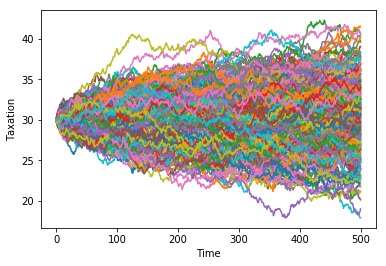

In [5]:
T = 500
for i in range(250):
    x, u, w = LQBarro.compute_sequence(x0, ts_length=T)
    plt.plot(list(range(T+1)), ((S - M @ F) @ x)[0, :])
plt.xlabel('Time')
plt.ylabel('Taxation')
plt.show()

We can see a similar, but smoother pattern, if we plot government debt over time. Debt is smoother due to the persistence of the government spending process.

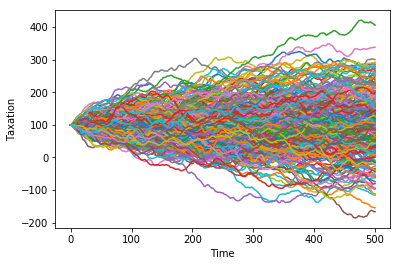

In [6]:
T = 500
for i in range(250):
    x, u, w = LQBarro.compute_sequence(x0, ts_length=T)
    plt.plot(list(range(T+1)), x[0, :])
plt.xlabel('Time')
plt.ylabel('Taxation')
plt.show()

## Python class to solve Markov jump linear quadratic control problems

To implement the extension to the Barro model in which $p_{t,t+1}$ varies over time, we must allow the M matrix to be time-varying. From the mapping of the Barro model into the LQ framework, this means that our Q and W matrices will now also vary over time. We can solve such a model using the LQ_Markov class, which solves Markov jump linear quandratic control problems as described above. 

The code for the class can be viewed [here](https://github.com/QuantEcon/TaxSmoothing/blob/master/lq_markov.py).

The class takes a variable number of arguments, to allow for there to be an arbitrary $N$ states of the world. To accomodate this, the matrices for each state of the world must be held in a "namedtuple". The value and policy functions are then found by iterating on the system of algebraic matrix Riccati equations. The solutions for $P,F,\rho$ are stored in Python "dictionaries".

The class also contains a "method", for simulating the model. This is an extension of a similar method in the LQ class, adapted to take into account the fact that the model's matrices depend on the state of the world.

Below we import all functionality from this code.

(You should download [the file](https://github.com/QuantEcon/TaxSmoothing/blob/master/lq_markov.py) and put it in the same directory as this notebook before you execute the next line.)

In [7]:
from lq_markov import *

## Barro model with a time-varying interest rate

We can use the above class to implement a version of the Barro model with a time-varying interest rate. The simplest way to extend the model is to allow the interest rate to take two possible values. We set:

$$ p^1_{t,t+1} = \beta + 0.02 = 0.97$$
$$ p^2_{t,t+1} = \beta - 0.017 = 0.933$$

Thus, the first state of the world has a low interest rate, and the second state of the world has a high interest rate.

We also need to specify a transition matrix for the state of the world, we use:

$$ \Pi = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix} $$
(so each state of the world is persisent, and there is an equal chance of moving from one to the other.)

The choice of parameters means that the unconditional expectation of $p_{t,t+1}$ is 0.9515, higher than $\beta (=0.95)$. If we were to set $p_{t,t+1} = 0.9515$ in the version of the model with a constant interest rate, government debt would explode.

In [8]:
# Create namedtuple to keep the R, Q, A, B, C, W matrices for each state of the world
world = namedtuple('world', ['A', 'B', 'C', 'R', 'Q', 'W'])

Π = np.array([[0.8, 0.2], 
               [0.2, 0.8]])

M1 = np.array([[-β - 0.02]])
M2 = np.array([[-β + 0.017]])

Q1 = M1.T @ M1
Q2 = M2.T @ M2
W1 = M1.T @ S
W2 = M2.T @ S

# Sets up the two states of the world
v1 = world(A=A, B=B, C=C, R=R, Q=Q1, W=W1)
v2 = world(A=A, B=B, C=C, R=R, Q=Q2, W=W2)

MJLQBarro = LQ_Markov(β, Π, v1, v2)

The decision rules are now dependent on the state of the world:

In [9]:
MJLQBarro.F[1]

array([[-0.98437712, 19.20516427, -0.8314215 ]])

In [10]:
MJLQBarro.F[2]

array([[-1.01434301, 21.5847983 , -0.83851116]])

Simulating a large number of such economies over time reveals interesting dynamics. Debt tends to stay low and stable, but periodically spikes up to high levels.

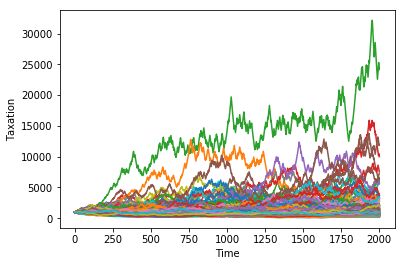

In [11]:
T = 2000
x0 = np.array([[1000, 1, 25]])
for i in range(250):
    x, u, w, s = MJLQBarro.compute_sequence(x0,ts_length=T)
    plt.plot(list(range(T+1)), x[0,:])
plt.xlabel('Time')
plt.ylabel('Taxation')
plt.show()